**Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
Aluno: _Gabriel Martinez Machado_     
Cartão UFRGS: _00332275_**     


# TRABALHO 01 - Introdução à teoria de vibrações [PEC00025]


### SUMÁRIO

[1.   Introdução](#section_1)  
[2.   Materiais e métodos](#section_2)  
[3.   Análise dos resultados](#section_3)  
[4.   Considerações finais](#section_4)    

---


In [16]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy
from IPython.display import Image
from IPython.core.display import HTML 


## INTRODUÇÃO<a name="section_1"></a>  

O presente trabalho tem por objetivo introduzir os conceitos de análise de sistemas amortecidos em vibração livre com um grau de liberdade e avaliar experimentalmente um modelo sistemático com esta característica, de modo a extrair e estudar parâmetros como frequência de vibração e razão de amortecimento.




## MATERIAIS E MÉTODOS <a name="section_2"></a> 

O processo de aquisição de dados foi desenvolvido a partir da utilização do aplicativo móvel iNVH BOSCH, versão 2.1.1, voltado para sistema operacional Android. O mesmo utiliza-se dos sensores de acelerômetro interno do _smartphone_ para avaliar os níveis de vibração nos três eixos locais e exportá-los a partir de uma saída de dados bruta (do inglês _"raw"_) em formato ASCII ``.csv``, objeto das análises utilizando a linguagem Python, a serem apresentadas na Seção 3.  

Para a realização do experimento utilizou-se uma régua metálica, onde uma de suas extremidades foi mantida fixa em uma mesa e na extremidade livre fez-se o acoplamento do aparelho celular, conforme apresentado na imagem esquemática abaixo. Deste modo, foram efetuados impulsos na extremidade do _smartphone_, de modo que a régua pudesse vibrar livremente.


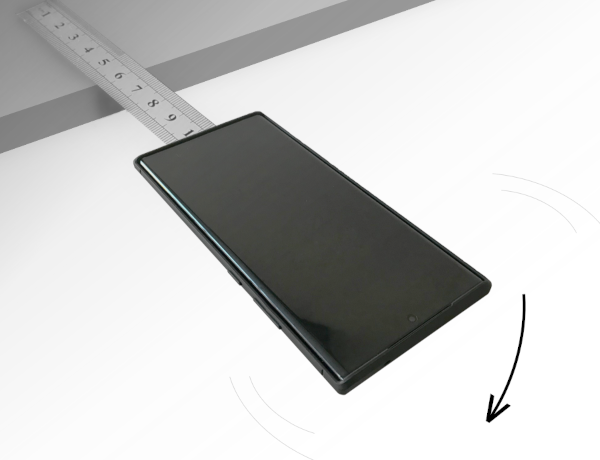

In [21]:
Image("images/02.png")

Apresenta-se, também, a tela de aquisição de dados de vibração do aplicativo iNVH da BOSCH.

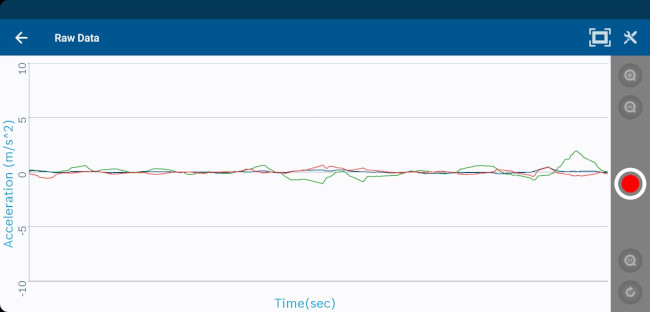

In [23]:
Image("images/03.jpeg")

## ANÁLISE DOS RESULTADOS <a name="section_3"></a> 

A seguir, prossegue-se para a importação do conjunto de dados exportados, visando a análise a partir do módulo MRPy. O primeiro passo consiste da leitura inicial, para aquisição das informações como a frequência de gravação do dispositivo em questão ($F_S$), tempo de gravação ($T_d$), número de eixos e número de pontos total.

 fs = 500.0Hz
 Td = 22.3s

 NX = 3
 N  = 11144
 M  = 5573



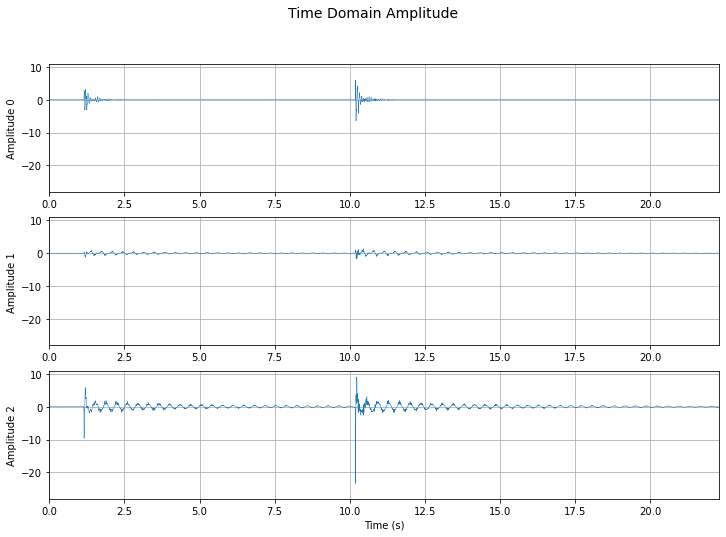

In [9]:
%matplotlib inline

data = MRPy.from_file('resources/data/t1_data', form='invh')

data.printAttrib()
data.plot_time(fig=1);


Como pode ser visto, são obtidos os resultados de amplitude para os três eixos locais. Em vista da presente análise, o objeto de estudo será a Amplitude 2. Uma vez que foram realizados dois impulsos durante o período de gravação, optou-se pela utilização do segundo impulso, no intervalo de ``[10.7:18.7]`` segundos, tal qual apresentado a seguir.

 fs = 500.0Hz
 Td = 8.0s

 NX = 3
 N  = 4000
 M  = 2001



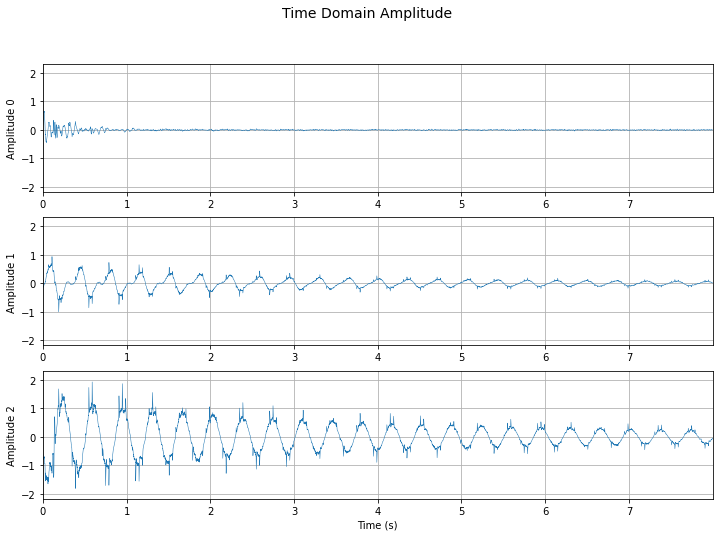

In [10]:
free = data.extract((10.7, 18.7), by='time')

free.printAttrib()
free.plot_time(fig=2);


Nesse ponto, permite-se realizar a estimativa da razão de amortecimento ($\zeta$) através do método por decremento logaritmo, apresentado anteriormente. Optou-se por fixar a diferença de amplitudes $u_i$ e $u_{i+N}$ em 2. Essa razão pode ser observada entre as cristas da terceira e da décima primeira onda, sendo assim, entre um número de ciclos $N=8$. Logo:

$$ \zeta = \frac{\ln (2 \, / \, 1)}{2 \pi \,N} = \frac{\ln (2)}{2 \pi \,8} = 1.38 \% $$


O passo seguinte consiste da utilização do atributo pertencente ao módulo MRPy, denominado ``.fit_decay``, onde a estimativa dos parâmetros de interesse é efetuada a partir do ajuste de uma curva pelo método dos mínimos quadrados.

Amplitude:     1.34m/s2
Frequency:     2.80Hz  
Damping ratio: 1.38%   
Phase:         -2.06rad 


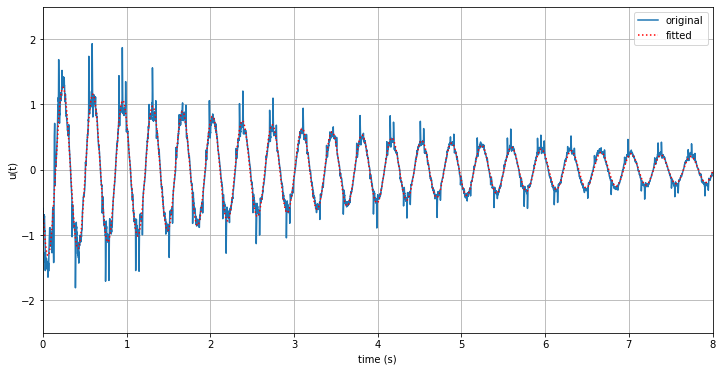

In [11]:
afit, par = free.fit_decay()
t         = free.t_axis()               # prepare time axis for plotting

plt.figure(4, figsize=(12, 6), clear=True)
plt.plot(t, free[2])
plt.plot(t, afit[2], 'r:')
plt.legend(('original','fitted'))

plt.xlim( 0, 8);  plt.xlabel('time (s)') 
plt.ylim(-2.5, 2.5);  plt.ylabel('u(t)') 

plt.grid(True) 

print('Amplitude:     {0:4.2f}m/s2'.format(par[2,0]))
print('Frequency:     {0:4.2f}Hz  '.format(par[2,1]))
print('Damping ratio: {0:4.2f}%   '.format(par[2,2]*100))
print('Phase:         {0:4.2f}rad '.format(par[2,3]))


Conforme observa-se, dispõem-se ambas as curvas de dados originais e ajustados pelo processo de mínimos quadrados. Os resultados de saída apresentam aplitude máxima de $1.34~m/s^2$, frequência $f = 2.80~Hz$ e razão de amortecimento $\zeta=1.38\%$.

## CONSIDERAÇÕES FINAIS <a name="section_4"></a> 
